In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns



In [2]:
df = pd.read_csv('Student_Performance_Missing.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,Yes,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,NaN
9998,9.0,97.0,Yes,NaN,0.0,95.0


In [3]:
df.isnull().sum()


Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [4]:
num_cols = df.select_dtypes('number').columns
print(num_cols.tolist())

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [5]:
cat_cols = df.select_dtypes(exclude='number').columns
print(cat_cols.tolist())


['Extracurricular Activities']


In [6]:
num_imp = SimpleImputer (strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [7]:
df[num_cols]=num_imp.fit_transform(df[num_cols])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,NaN,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [8]:
df[cat_cols]=cat_imp.fit_transform(df[cat_cols])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,No,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

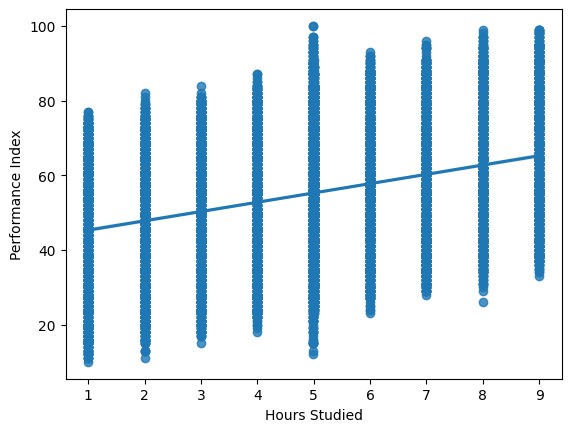

In [9]:
sns.regplot(df, x='Hours Studied' ,y= 'Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Previous Scores'>

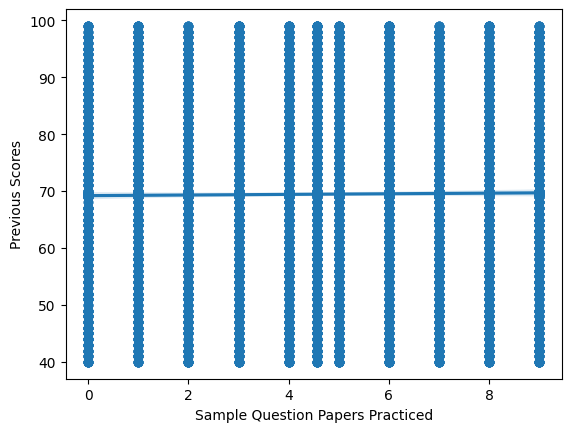

In [10]:
sns.regplot(df,x='Sample Question Papers Practiced',y='Previous Scores')


In [11]:
X= df.drop(columns=['Performance Index'])
y= df['Performance Index']

In [12]:
print(X)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                         No     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [13]:
print(y)

0       91.000000
1       65.000000
2       45.000000
3       36.000000
4       66.000000
          ...    
9995    23.000000
9996    58.000000
9997    55.213175
9998    95.000000
9999    64.000000
Name: Performance Index, Length: 10000, dtype: float64


In [14]:
Xtrain , Xtest , ytrain ,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
cat_cols=X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['number']).columns

In [16]:
num_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    )
)

In [17]:
cat_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
    )
)

In [18]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

In [19]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr',LinearRegression())
])

In [20]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=(('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()))),
                                                  Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=(('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first')))),
                                                  Index(['Extracurricular Activities'], dtype='object'))])),
                ('lr', LinearRegression())])

In [21]:
from joblib import dump, load #dump is used to save the model and load is used to load the model 
with open('models/MLR_2.joblib','wb')as f:
    dump(model, f) # dumping the model into the file
    print("Model dumped successfully")

Model dumped successfully


In [22]:
import gradio as gr
import pandas as pd
# make a single record DataFrame
def prediction(Hours_Studied, Previous_Scores, Extracurricular_Activities, Sleep_Hours, Sample_Question_Papers_Practiced):
    df = pd.DataFrame({
        'Hours Studied': [Hours_Studied],
        'Previous Scores': [Previous_Scores],
        'Extracurricular Activities': [Extracurricular_Activities],
        'Sleep Hours': [Sleep_Hours],
        'Sample Question Papers Practiced': [Sample_Question_Papers_Practiced],
    })
    # load joblib model file
    from joblib import load
    with open('models/MLR_2.joblib', 'rb') as f:
        model = load(f)

    # predict the performance index
    prediction = model.predict(df)   # return the numpy array
    return prediction[0]            # return the predicted value

ui = gr.Interface(
    fn=prediction,
    inputs=['number', 'number', 'text', 'number', 'number'],
    outputs=gr.Text(),
    title='Student Performance',
    examples=[[7.0, 99, 'Yes', 9, 1.0]]
)
ui.launch()

c:\Users\Nisha Yadav\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
